<a href="https://colab.research.google.com/github/symhsym/Example/blob/main/cifar_CNN_XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def simplified_lenet5_cifar10():
    model = Sequential([
        Conv2D(38, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3), padding='valid'),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        Conv2D(72, kernel_size=(5, 5), activation='relu', padding='valid'),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        Flatten(),
        #####
        Dense(250, activation='relu'),
        #####
        # Output layer for CIFAR-10 classification
        Dense(10, activation='softmax')
    ])
    return model

model = simplified_lenet5_cifar10()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 38)        2888      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 38)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 72)        68472     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 72)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1800)              0         
                                                                 
 dense (Dense)               (None, 250)               4

In [ ]:
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from sklearn.model_selection import train_test_split


#####
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
#####

# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images


#####
# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train)/255
X_test  = (X_test) /255
X_valid = (X_valid)/255
#####


y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)



# Initialize the model
model = simplified_lenet5_cifar10()

adam = Adam(learning_rate=0.001)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Set training parameters
batch_size = 128
epochs = 100


# Train the model
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=epochs,
                    validation_data=(X_valid, y_valid))

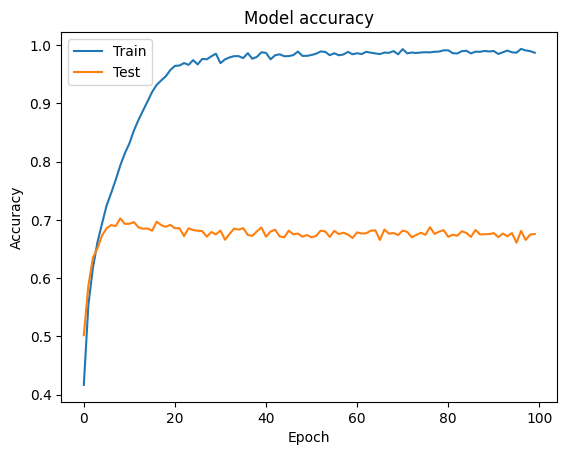

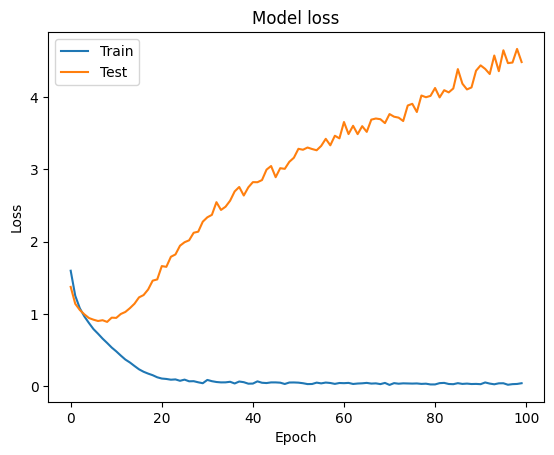

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import Model
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np


(a, y_train), (b, y_test) = cifar10.load_data()
a, c, y_train, y_valid = train_test_split(a, y_train, test_size=0.1, random_state=0)

# 从训练好的 CNN 模型中移除最后的分类层，以获得特征
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)

# 使用特征提取器从训练和测试数据中提取特征
features_train = feature_extractor.predict(X_train)
features_test = feature_extractor.predict(X_test)

dtrain = xgb.DMatrix(
		features_train,
		label=y_train
	)

iterations = [100, 200, 300, 400, 500]
max_depths = [4, 6, 8, 10, 12]
learning_rates = [0.005, 0.01, 0.05, 0.1, 0.2]


# 遍历参数组合

clf = xgb.XGBClassifier(n_estimators=300, max_depth=12, learning_rate=0.01, num_class = 10)

            #
clf.fit(features_train, y_train)

            #
y_pred = clf.predict(features_test)
accuracy = accuracy_score(y_test, y_pred)

print("最佳分类准确率:", accuracy)

313/313 [==============================] - 1s 2ms/step


In [ ]:
dtrain = xgb.DMatrix(
		features_train,
		label=y_train
	)
dtrain


In [ ]:
features_test

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 4.221805 ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.0561606,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)